In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load your dataset
df = pd.read_csv('flow_dataset_all_features1.csv')

# Initial inspection
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())


Dataset shape: (100000, 82)

First 5 rows:


,Unnamed: 0,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,attack_type,malicious
0,0,51746.0,80.0,6.0,291959.0,5.0,4.0,196.0,375.0,196.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,benign,0
1,1,50096.0,443.0,6.0,291320.0,5.0,4.0,251.0,7.0,251.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,benign,0
2,2,51749.0,80.0,6.0,292739.0,5.0,4.0,196.0,375.0,196.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,benign,0
3,3,50099.0,443.0,6.0,292398.0,5.0,4.0,251.0,7.0,251.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,benign,0
4,4,51752.0,80.0,6.0,293252.0,5.0,4.0,196.0,375.0,196.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,benign,0


## Data cleaning & preprocessing

This section standardizes types, handles missing values, and prepares the dataset for modeling. Adjust thresholds as needed.

/tmp/ipython-input-295588941.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=attack_counts.values,


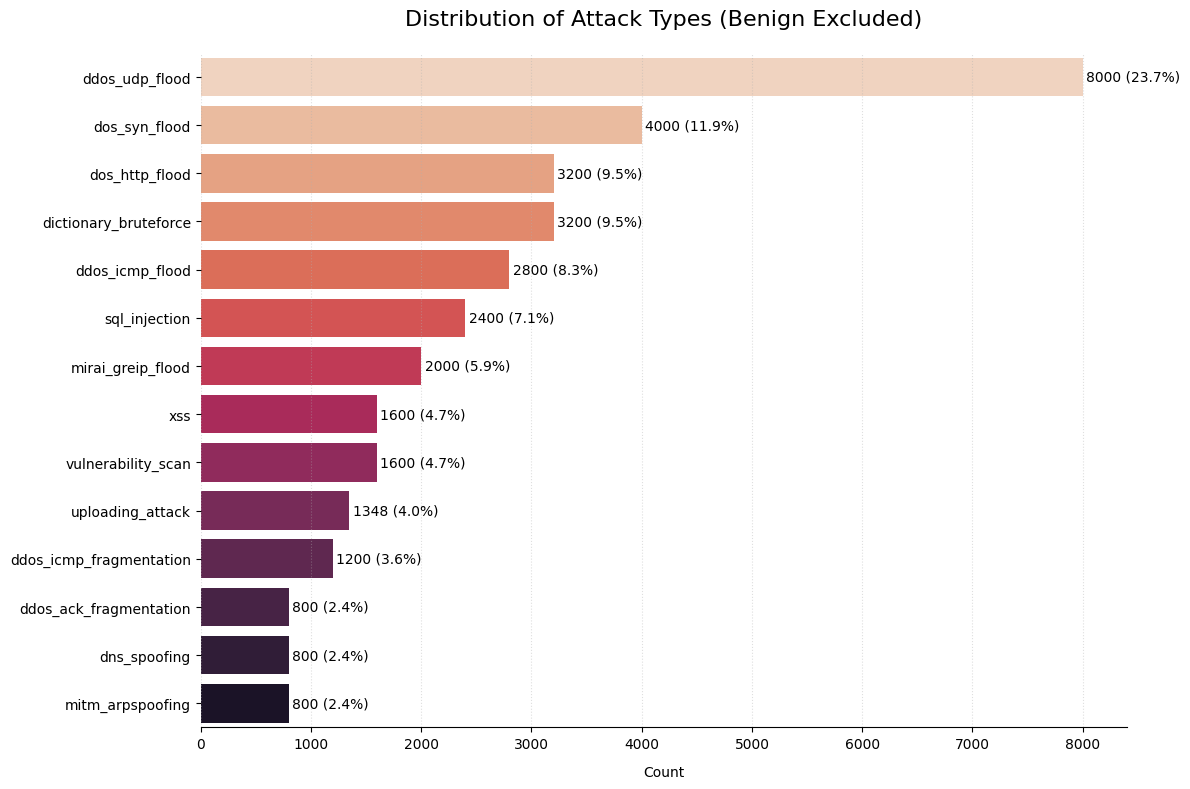

In [ ]:
# Filter out benign traffic
attacks_only = df[df['attack_type'] != 'benign']

# Count attack types
attack_counts = attacks_only['attack_type'].value_counts()

# Create styled bar plot
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=attack_counts.values,
                y=attack_counts.index,
                palette='rocket_r')  # Reverse rocket palette for better contrast

# Customize annotations
for i, v in enumerate(attack_counts.values):
    ax.text(v + 30, i,
           f"{v} ({v/len(attacks_only):.1%})",
           color='black',
           va='center')

plt.title('Distribution of Attack Types (Benign Excluded)', pad=20, fontsize=16)
plt.xlabel('Count', labelpad=10)
plt.ylabel('')
plt.xticks(rotation=0)
plt.grid(axis='x', linestyle=':', alpha=0.4)
sns.despine(left=True)
plt.tight_layout()
plt.show()

In [ ]:
# Numerical summary
print("\nDescriptive statistics:")
display(df.describe(include='all'))

# Categorical summary
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts(normalize=True))


Descriptive statistics:


,Unnamed: 0,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,attack_type,malicious
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.00000,1.000000e+05,1.000000e+05,100000.000000,...,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000,100000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,benign,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66252,NaN
mean,49999.500000,37667.244730,10870.259620,10.282770,3.401929e+07,77.022570,9.15245,7.309872e+03,2.730753e+03,208.590940,...,1.026013e+06,5.395644e+05,1.593101e+06,6.515214e+05,8.924275e+06,7.841178e+05,9.912667e+06,8.236208e+06,NaN,0.337480
std,28867.657797,19329.336529,18555.924394,5.544119,4.809103e+07,4334.125598,147.18665,1.924285e+05,2.079636e+05,847.798797,...,4.093637e+06,3.282669e+06,6.542800e+06,2.807118e+06,1.886611e+07,3.991799e+06,1.980467e+07,1.854989e+07,NaN,0.472852
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.00000,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000
25%,24999.750000,28611.000000,80.000000,6.000000,1.890275e+05,2.000000,1.00000,2.800000e+01,0.000000e+00,28.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000
50%,49999.500000,43102.000000,443.000000,6.000000,4.037220e+05,5.000000,2.00000,1.960000e+02,4.400000e+01,69.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000
75%,74999.250000,52461.000000,8886.000000,17.000000,8.645762e+07,9.000000,4.00000,2.510000e+02,2.510000e+02,196.000000,...,6.377875e+04,0.000000e+00,7.481425e+04,3.204200e+04,7.044448e+06,4.784077e+03,1.005512e+07,5.685320e+06,NaN,1.000000



Value counts for attack_type:
attack_type
benign                     0.66252
ddos_udp_flood             0.08000
dos_syn_flood              0.04000
dos_http_flood             0.03200
dictionary_bruteforce      0.03200
ddos_icmp_flood            0.02800
sql_injection              0.02400
mirai_greip_flood          0.02000
xss                        0.01600
vulnerability_scan         0.01600
uploading_attack           0.01348
ddos_icmp_fragmentation    0.01200
ddos_ack_fragmentation     0.00800
dns_spoofing               0.00800
mitm_arpspoofing           0.00800
Name: proportion, dtype: float64


In [ ]:
from sklearn.preprocessing import LabelEncoder


# 2. Create encoded attack type column (preserves original categories)
le = LabelEncoder()
df['attack_type_encoded'] = le.fit_transform(df['attack_type'])

# Print mapping for reference
print("Attack Type Encoding Mapping:")
for i, atk in enumerate(le.classes_):
    print(f"{atk}: {i}")

# 3. Proceed with normalization (excluding encoded labels)
numerical_cols = [col for col in df.columns
                 if col not in ['attack_type', 'attack_type_encoded', 'malicious']]



# Verify
print("\nFinal columns:", df.columns.tolist())
print("\nEncoded attack type sample:")
print(df[['attack_type', 'attack_type_encoded']].drop_duplicates().sort_values('attack_type_encoded'))

Attack Type Encoding Mapping:
benign: 0
ddos_ack_fragmentation: 1
ddos_icmp_flood: 2
ddos_icmp_fragmentation: 3
ddos_udp_flood: 4
dictionary_bruteforce: 5
dns_spoofing: 6
dos_http_flood: 7
dos_syn_flood: 8
mirai_greip_flood: 9
mitm_arpspoofing: 10
sql_injection: 11
uploading_attack: 12
vulnerability_scan: 13
xss: 14

Final columns: ['Unnamed: 0', 'Src Port', 'Dst Port', 'Protocol', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet', 'Total Length of Bwd Packet', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd U

In [ ]:
df.head()

,Unnamed: 0,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,attack_type,malicious,attack_type_encoded
0,0,51746.0,80.0,6.0,291959.0,5.0,4.0,196.0,375.0,196.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,benign,0,0
1,1,50096.0,443.0,6.0,291320.0,5.0,4.0,251.0,7.0,251.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,benign,0,0
2,2,51749.0,80.0,6.0,292739.0,5.0,4.0,196.0,375.0,196.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,benign,0,0
3,3,50099.0,443.0,6.0,292398.0,5.0,4.0,251.0,7.0,251.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,benign,0,0
4,4,51752.0,80.0,6.0,293252.0,5.0,4.0,196.0,375.0,196.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,benign,0,0


In [ ]:
# Simple list of column names
print(df.columns.tolist())

['Unnamed: 0', 'Src Port', 'Dst Port', 'Protocol', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets', 'Total Length of Fwd Packet', 'Total Length of Bwd Packet', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWR Flag C

In [ ]:
df['malicious'].value_counts()

,count
malicious,
0,66252
1,33748


In [ ]:
columns_to_drop = ['Unnamed: 0']
df = df.drop(columns=columns_to_drop)

In [ ]:
df.drop(columns=['attack_type'], inplace=True)

In [ ]:
def robust_cleaner(df):
    df = df.copy()
    for col in df.select_dtypes(include=['number']).columns:
        # Step 1: Replace infinities with NaN
        df[col] = df[col].replace([np.inf, -np.inf], np.nan)

        # Step 2: Impute NaN with median
        col_median = df[col].median()
        df[col] = df[col].fillna(col_median)

        # Step 3: Clip extreme values to 5 standard deviations
        upper_limit = df[col].mean() + 5 * df[col].std()
        lower_limit = df[col].mean() - 5 * df[col].std()
        df[col] = df[col].clip(lower_limit, upper_limit)
    return df

df_clean = robust_cleaner(df)

In [ ]:
def verify_data(df):
    print("=== Data Health Check ===")
    print(f"Total Rows: {len(df)}")
    print(f"Infinite Values: {np.isinf(df.select_dtypes(include=['number'])).sum().sum()}")
    print(f"NaN Values: {df.isna().sum().sum()}")
    print("\nExtreme Value Report:")
    display(df.select_dtypes(include=['number']).describe().loc[['min', 'max']])

verify_data(df_clean)

=== Data Health Check ===
Total Rows: 100000
Infinite Values: 0
NaN Values: 0

Extreme Value Report:


,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,malicious,attack_type_encoded
min,0.0,0.0,0.0,0.0,1.00000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
max,65535.0,65497.0,17.0,120000000.0,21747.65056,745.085702,969452.421117,1.042549e+06,4447.584924,534.031183,...,2.149420e+07,1.695291e+07,3.430710e+07,1.468711e+07,1.032548e+08,2.074311e+07,1.089360e+08,1.009857e+08,1.0,14.0


In [ ]:
from sklearn.preprocessing import RobustScaler
# Exclude target/label columns (malicious, attack_type_encoded)
features = df_clean.drop(columns=["malicious", "attack_type_encoded"])

# Apply RobustScaler ONLY to numeric features
scaler = RobustScaler()
X_scaled = scaler.fit_transform(features)

# Check post-scaling stats (median ≈ 0, IQR ≈ 1)
X_scaled_df = pd.DataFrame(X_scaled, columns=features.columns)
print("Medians:\n", X_scaled_df.median().round(2))
print("\nIQRs:\n", (X_scaled_df.quantile(0.75) - X_scaled_df.quantile(0.25)).round(2))

Medians:
 Src Port            0.0
Dst Port            0.0
Protocol            0.0
Flow Duration       0.0
Total Fwd Packet    0.0
                   ... 
Active Min          0.0
Idle Mean           0.0
Idle Std            0.0
Idle Max            0.0
Idle Min            0.0
Length: 79, dtype: float64

IQRs:
 Src Port            1.0
Dst Port            1.0
Protocol            1.0
Flow Duration       1.0
Total Fwd Packet    1.0
                   ... 
Active Min          1.0
Idle Mean           1.0
Idle Std            1.0
Idle Max            1.0
Idle Min            1.0
Length: 79, dtype: float64


In [ ]:
print("Medians after scaling (should be ~0):\n", X_scaled_df.median())
print("\nIQRs after scaling (should be ~1):\n", X_scaled_df.quantile(0.75) - df_clean.quantile(0.25))

Medians after scaling (should be ~0):
 Src Port            0.0
Dst Port            0.0
Protocol            0.0
Flow Duration       0.0
Total Fwd Packet    0.0
                   ... 
Active Min          0.0
Idle Mean           0.0
Idle Std            0.0
Idle Max            0.0
Idle Min            0.0
Length: 79, dtype: float64

IQRs after scaling (should be ~1):
 ACK Flag Count                 0.875000
Active Max                     1.000000
Active Mean                    1.000000
Active Min                     1.000000
Active Std                     0.000000
                                ...    
Total Length of Bwd Packet     0.824701
Total Length of Fwd Packet   -27.753363
URG Flag Count                 0.000000
attack_type_encoded                 NaN
malicious                           NaN
Length: 81, dtype: float64


In [ ]:
X_scaled_df.head()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0.362432,-0.041222,0.0,-0.001296,0.0,0.666667,0.000000,1.318725,0.755952,0.0,...,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.293249,0.000000,0.0,-0.001303,0.0,0.666667,0.246637,-0.147410,1.083333,0.0,...,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.362558,-0.041222,0.0,-0.001286,0.0,0.666667,0.000000,1.318725,0.755952,0.0,...,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.293375,0.000000,0.0,-0.001290,0.0,0.666667,0.246637,-0.147410,1.083333,0.0,...,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.362683,-0.041222,0.0,-0.001281,0.0,0.666667,0.000000,1.318725,0.755952,0.0,...,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:

labels = df_clean[['malicious', 'attack_type_encoded']]


# 4. Reattach labels to scaled features
df_concat = pd.concat([X_scaled_df, labels], axis=1)

In [ ]:
df_concat.to_csv('normalized_flow_dataset.csv')

In [3]:
df = pd.read_csv('/content/normalized_flow_dataset.csv')

In [6]:
df.head()

,Src Port,Dst Port,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,malicious,attack_type_encoded
0,0.362432,-0.041222,0.0,-0.001296,0.0,0.666667,0.000000,1.318725,0.755952,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,0.293249,0.000000,0.0,-0.001303,0.0,0.666667,0.246637,-0.147410,1.083333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0.362558,-0.041222,0.0,-0.001286,0.0,0.666667,0.000000,1.318725,0.755952,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,0.293375,0.000000,0.0,-0.001290,0.0,0.666667,0.246637,-0.147410,1.083333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,0.362683,-0.041222,0.0,-0.001281,0.0,0.666667,0.000000,1.318725,0.755952,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [5]:
columns_to_drop = ['Unnamed: 0']
df = df.drop(columns=columns_to_drop)

In [ ]:
# Calculate variance for all numerical features
variances = df.select_dtypes(include=['number']).var()

# Display sorted by variance
print(variances.sort_values(ascending=False))

Bwd IAT Min            1.588948e+14
Active Std             4.008858e+12
Bwd Bulk Rate Avg      1.149520e+10
Bwd Bytes/Bulk Avg     3.825142e+09
Fwd Packets/s          5.229092e+06
                           ...     
Bwd URG Flags          0.000000e+00
Fwd Packet/Bulk Avg    0.000000e+00
Fwd Bytes/Bulk Avg     0.000000e+00
Fwd Bulk Rate Avg      0.000000e+00
URG Flag Count         0.000000e+00
Length: 81, dtype: float64


In [ ]:
# Create a summary dataframe
stats_df = pd.DataFrame({
    'Variance': variances,
    'StdDev': df[variances.index].std(),
    'Mean': df[variances.index].mean(),
    'Variance/Mean Ratio': variances / df[variances.index].mean().abs()
}).sort_values('Variance', ascending=False)

# Display full statistics
pd.set_option('display.float_format', lambda x: '%.4f' % x)
display(stats_df)

,Variance,StdDev,Mean,Variance/Mean Ratio
Bwd IAT Min,158894819669109.9688,12605348.8515,3421583.6470,46438969.8057
Active Std,4008858144084.6934,2002213.3113,395338.3021,10140323.1686
Bwd Bulk Rate Avg,11495199120.6143,107215.6664,5185.0678,2216981.4411
Bwd Bytes/Bulk Avg,3825142125.5589,61847.7334,3829.3385,998904.1471
Fwd Packets/s,5229092.0061,2286.7208,172.5934,30297.1706
...,...,...,...,...
Bwd URG Flags,0.0000,0.0000,0.0000,NaN
Fwd Packet/Bulk Avg,0.0000,0.0000,0.0000,NaN
Fwd Bytes/Bulk Avg,0.0000,0.0000,0.0000,NaN
Fwd Bulk Rate Avg,0.0000,0.0000,0.0000,NaN


In [ ]:
# Check for constant features
constant_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Constant columns:", constant_cols)

# Check binary features (if any)
binary_cols = [col for col in df.columns if set(df[col].unique()) == {0, 1}]
print("Binary columns:", binary_cols)

Constant columns: ['Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'URG Flag Count', 'Fwd Bytes/Bulk Avg', 'Fwd Packet/Bulk Avg', 'Fwd Bulk Rate Avg']
Binary columns: ['Fwd PSH Flags', 'malicious']


In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(['malicious', 'attack_type_encoded'], axis=1)
y = df['malicious']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.3,
                                                   shuffle=True,
                                                   stratify=y,
                                                   random_state=42)

In [8]:
import numpy as np
import pandas as pd

# Create boolean mask of infinite values
inf_mask = np.isinf(X.select_dtypes(include=['number']))

# Get rows and columns with infinite values
inf_rows, inf_cols = np.where(inf_mask)

# Create a report of infinite values
if len(inf_rows) > 0:
    inf_report = pd.DataFrame({
        'Row': inf_rows,
        'Column': X.columns[inf_cols],
        'Value': X.select_dtypes(include=['number']).values[inf_mask]
    })
    print(f"Found {len(inf_report)} infinite values:")
    display(inf_report.head())

    # Show affected columns summary
    print("\nColumns containing infinite values:")
    display(pd.Series(X.columns[inf_cols].tolist()).value_counts())
else:
    print("No infinite values found in the dataset")

No infinite values found in the dataset


## Exploratory Data Analysis (EDA)

We'll visualize distributions, correlations, attack timelines, and top features. Below are automated plots and suggestions.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Filter out infinite values if needed
df_clean = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['Packet Length Max'])

# Get top 10 attack types by frequency for clearer visualization
top_attacks = df_clean['attack_type_encoded'].value_counts().nlargest(16).index
df_filtered = df_clean[df_clean['attack_type_encoded'].isin(top_attacks)]

/tmp/ipython-input-3133469219.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


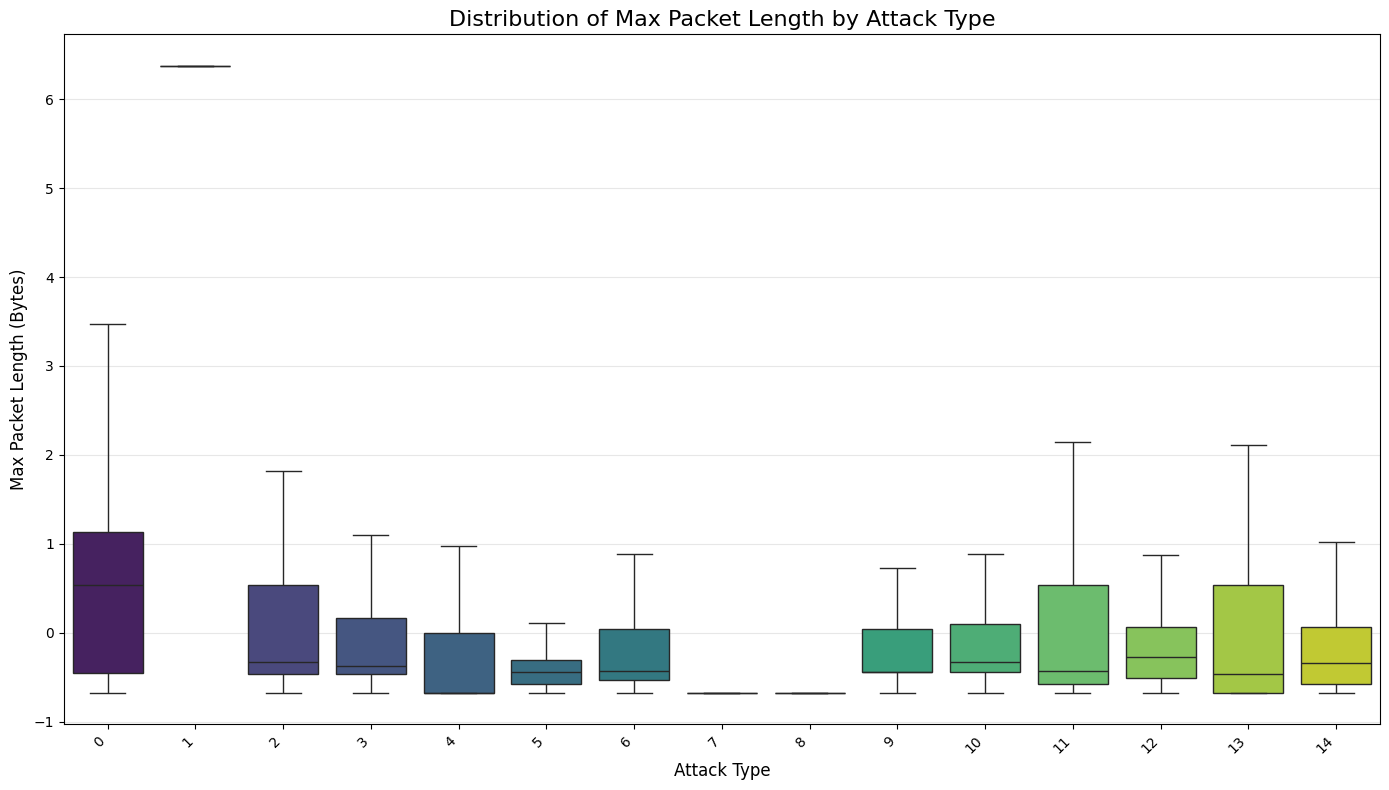

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=df_filtered,
    x='attack_type_encoded',
    y='Packet Length Max',
    palette='viridis',
    showfliers=False  # Hides outliers for cleaner plot
)
plt.title('Distribution of Max Packet Length by Attack Type', fontsize=16)
plt.xlabel('Attack Type', fontsize=12)
plt.ylabel('Max Packet Length (Bytes)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('attack_vs_packetlength_boxplot.png', dpi=300)
plt.show()

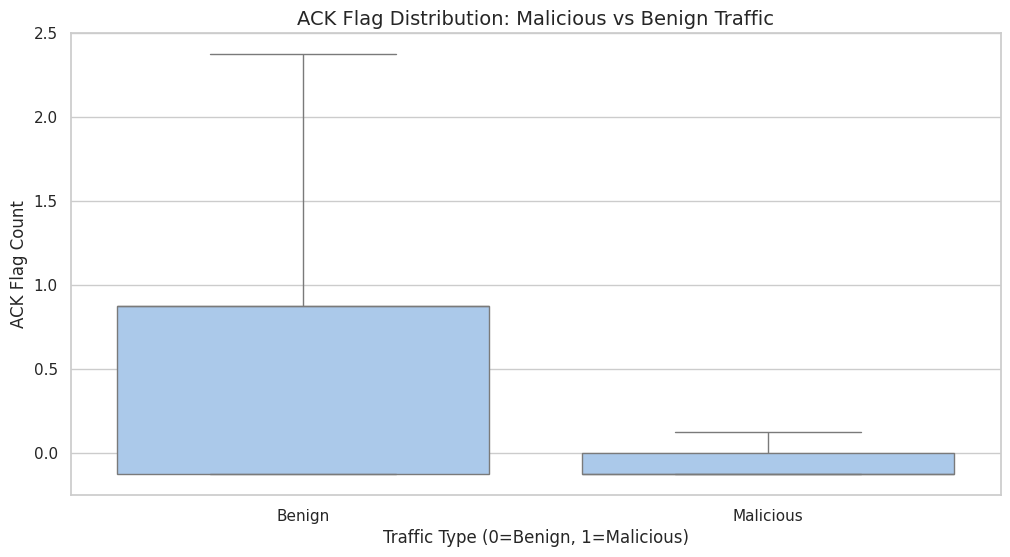

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set style
sns.set(style="whitegrid", palette="pastel")

# Create the plot
plt.figure(figsize=(12, 6))

# Boxplot version
sns.boxplot(x='malicious', y='ACK Flag Count', data=df, showfliers=False)
plt.title('ACK Flag Distribution: Malicious vs Benign Traffic', fontsize=14)
plt.xlabel('Traffic Type (0=Benign, 1=Malicious)', fontsize=12)
plt.ylabel('ACK Flag Count', fontsize=12)
plt.xticks([0, 1], ['Benign', 'Malicious'])
plt.savefig('ack_vs_malicious_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

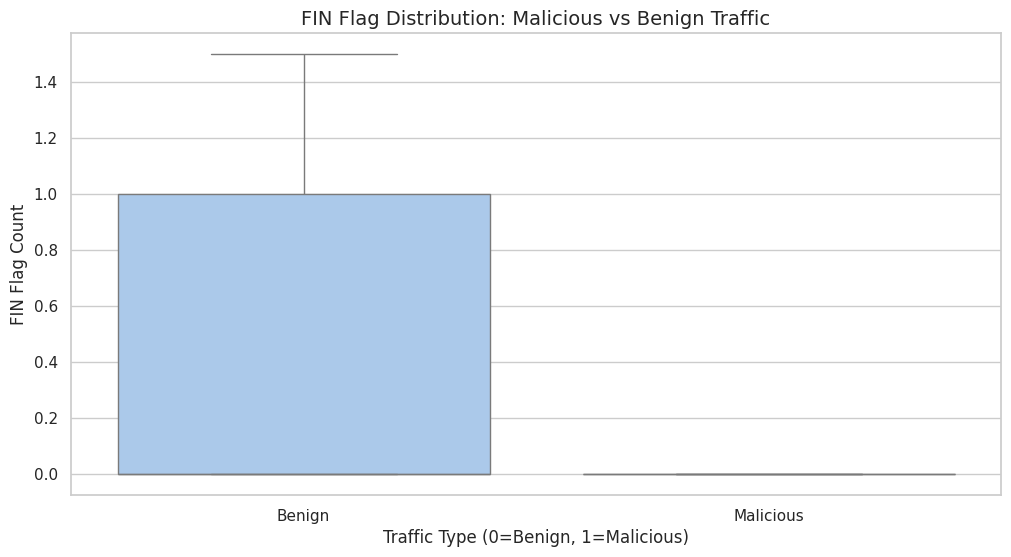

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set style
sns.set(style="whitegrid", palette="pastel")

# Create the plot
plt.figure(figsize=(12, 6))

# Boxplot version for SYN Flag Count
sns.boxplot(x='malicious', y='FIN Flag Count', data=df, showfliers=False)
plt.title('FIN Flag Distribution: Malicious vs Benign Traffic', fontsize=14)
plt.xlabel('Traffic Type (0=Benign, 1=Malicious)', fontsize=12)
plt.ylabel('FIN Flag Count', fontsize=12)
plt.xticks([0, 1], ['Benign', 'Malicious'])

# Save as high-res image
plt.savefig('syn_vs_malicious_boxplot.png', dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
from scipy import stats

# Calculate group statistics
ack_stats = df.groupby('malicious')['ACK Flag Count'].agg(['mean', 'median', 'std', 'count'])
print("ACK Flag Count Statistics:")
display(ack_stats)

# T-test for significance
benign = df[df['malicious'] == 0]['ACK Flag Count']
malicious = df[df['malicious'] == 1]['ACK Flag Count']
t_stat, p_value = stats.ttest_ind(benign, malicious, equal_var=False)

print(f"\nT-test Results: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")

ACK Flag Count Statistics:


,mean,median,std,count
malicious,,,,
0,1.7818,0.8750,12.0188,66252
1,0.2081,-0.1250,2.8073,33748



T-test Results: t-statistic = 32.03, p-value = 0.0000


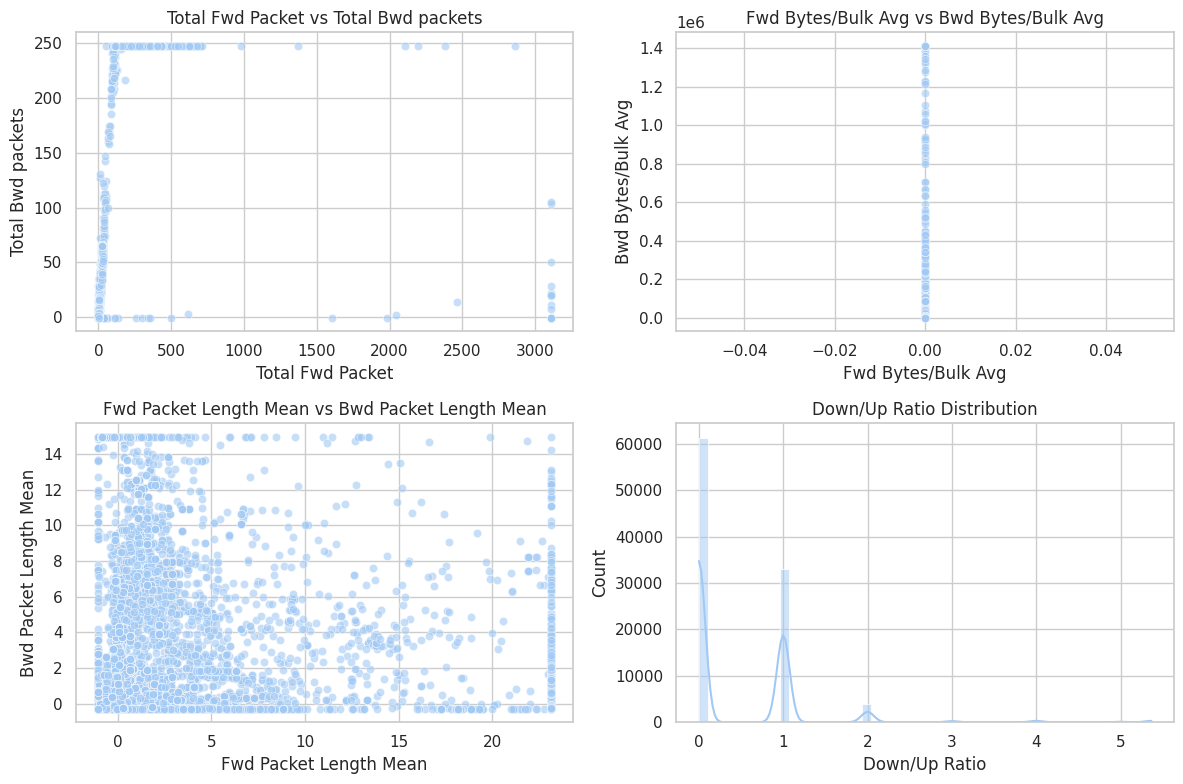

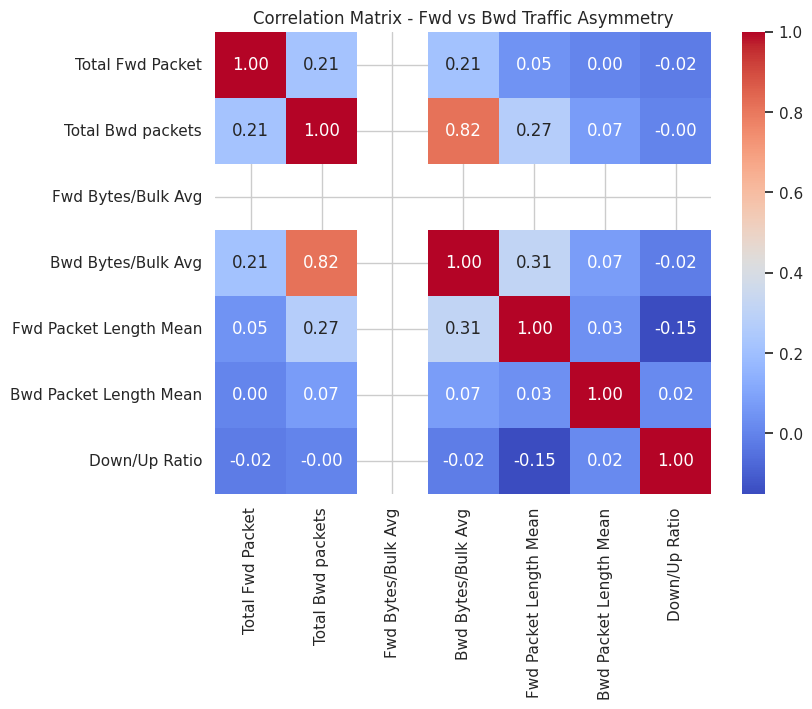

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Scatter plots to visualize asymmetry
plt.figure(figsize=(12, 8))

# 1. Total Fwd Packet vs Total Bwd packets
plt.subplot(2, 2, 1)
sns.scatterplot(x='Total Fwd Packet', y='Total Bwd packets', data=df, alpha=0.6)
plt.title('Total Fwd Packet vs Total Bwd packets')
plt.xlabel('Total Fwd Packet')
plt.ylabel('Total Bwd packets')

# 2. Fwd Bytes/Bulk Avg vs Bwd Bytes/Bulk Avg
plt.subplot(2, 2, 2)
sns.scatterplot(x='Fwd Bytes/Bulk Avg', y='Bwd Bytes/Bulk Avg', data=df, alpha=0.6)
plt.title('Fwd Bytes/Bulk Avg vs Bwd Bytes/Bulk Avg')
plt.xlabel('Fwd Bytes/Bulk Avg')
plt.ylabel('Bwd Bytes/Bulk Avg')

# 3. Fwd Packet Length Mean vs Bwd Packet Length Mean
plt.subplot(2, 2, 3)
sns.scatterplot(x='Fwd Packet Length Mean', y='Bwd Packet Length Mean', data=df, alpha=0.6)
plt.title('Fwd Packet Length Mean vs Bwd Packet Length Mean')
plt.xlabel('Fwd Packet Length Mean')
plt.ylabel('Bwd Packet Length Mean')

# 4. Down/Up Ratio distribution
plt.subplot(2, 2, 4)
sns.histplot(df['Down/Up Ratio'], bins=50, kde=True)
plt.title('Down/Up Ratio Distribution')
plt.xlabel('Down/Up Ratio')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Correlation analysis for these features
features = [
    'Total Fwd Packet', 'Total Bwd packets',
    'Fwd Bytes/Bulk Avg', 'Bwd Bytes/Bulk Avg',
    'Fwd Packet Length Mean', 'Bwd Packet Length Mean',
    'Down/Up Ratio'
]

corr_matrix = df[features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Fwd vs Bwd Traffic Asymmetry')
plt.show()


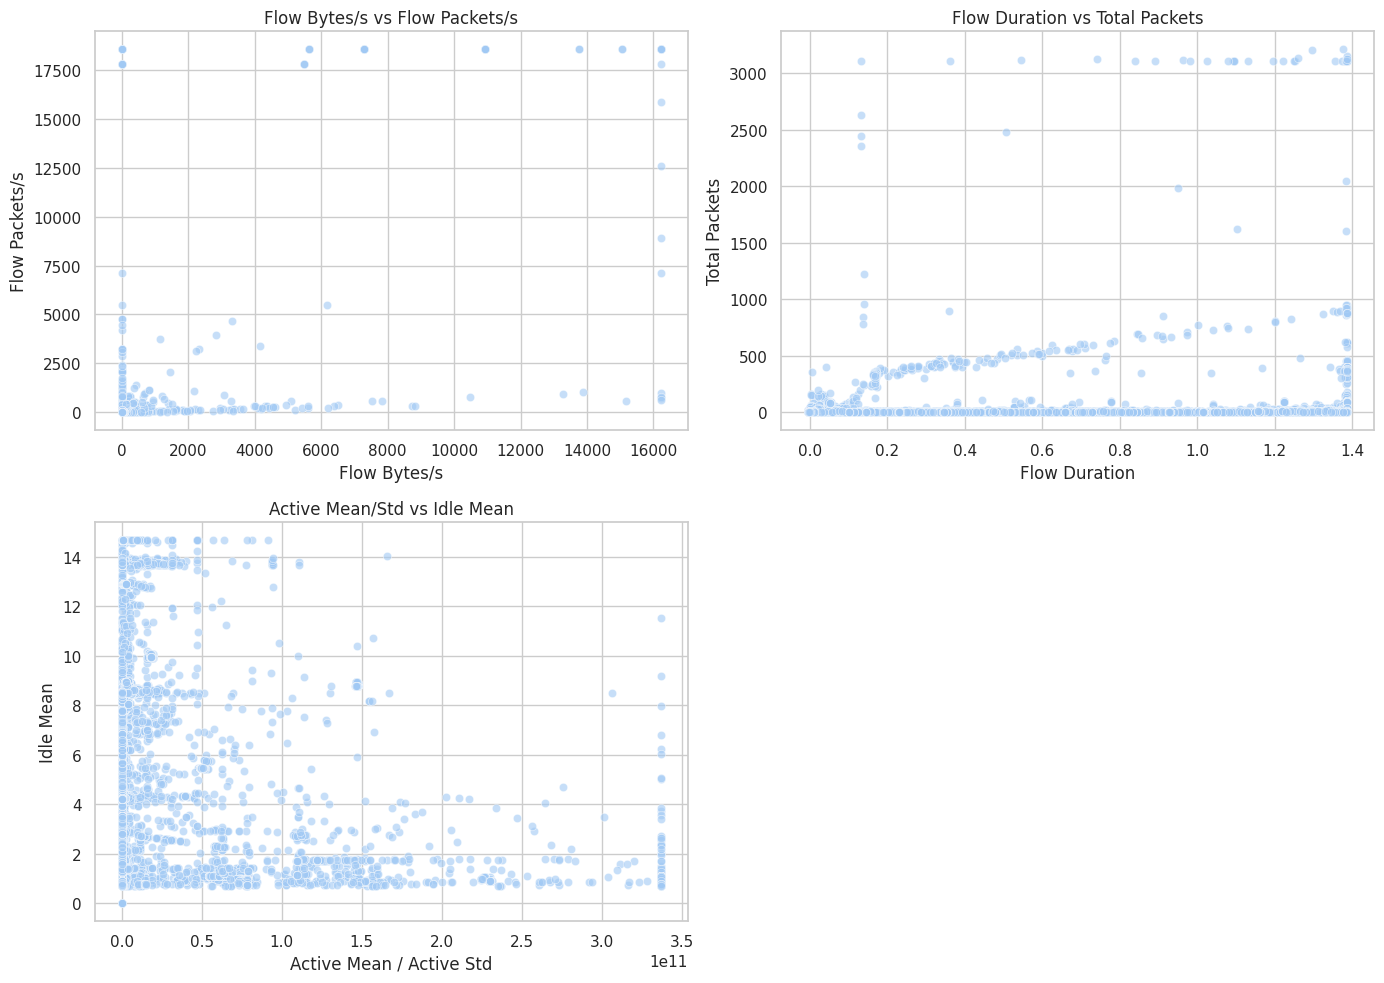

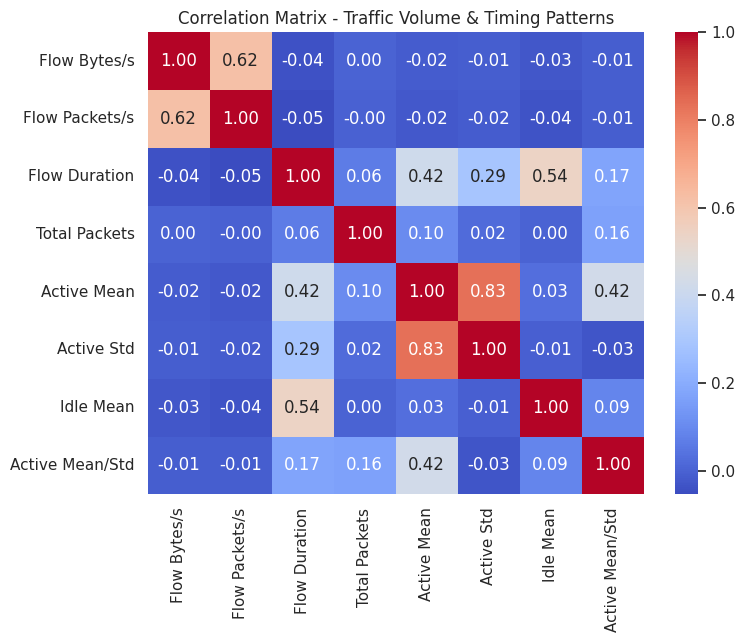

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



plt.figure(figsize=(14, 10))

# 1. Flow Bytes/s vs Flow Packets/s
plt.subplot(2, 2, 1)
sns.scatterplot(
    x='Flow Bytes/s',
    y='Flow Packets/s',
    data=df, alpha=0.6
)
plt.title('Flow Bytes/s vs Flow Packets/s')
plt.xlabel('Flow Bytes/s')
plt.ylabel('Flow Packets/s')

# 2. Flow Duration vs Total Packets (Fwd + Bwd)
df['Total Packets'] = df['Total Fwd Packet'] + df['Total Bwd packets']
plt.subplot(2, 2, 2)
sns.scatterplot(
    x='Flow Duration',
    y='Total Packets',
    data=df, alpha=0.6
)
plt.title('Flow Duration vs Total Packets')
plt.xlabel('Flow Duration')
plt.ylabel('Total Packets')

# 3. Active Mean/Std vs Idle Mean
# Create ratio for Active Mean / Active Std
df['Active Mean/Std'] = df['Active Mean'] / (df['Active Std'] + 1e-9)  # avoid division by zero
plt.subplot(2, 2, 3)
sns.scatterplot(
    x='Active Mean/Std',
    y='Idle Mean',
    data=df, alpha=0.6
)
plt.title('Active Mean/Std vs Idle Mean')
plt.xlabel('Active Mean / Active Std')
plt.ylabel('Idle Mean')

plt.tight_layout()
plt.show()

# Correlation analysis for these features
features = [
    'Flow Bytes/s', 'Flow Packets/s',
    'Flow Duration', 'Total Packets',
    'Active Mean', 'Active Std', 'Idle Mean',
    'Active Mean/Std'
]

corr_matrix = df[features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix - Traffic Volume & Timing Patterns')
plt.show()


In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=150,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss',
    importance_type='gain'  # Focus on accuracy improvement
)

model.fit(X_train, y_train,
          eval_set=[(X_test, y_test)],
          verbose=True)

[0]	validation_0-logloss:0.57906
[1]	validation_0-logloss:0.53029
[2]	validation_0-logloss:0.49036
[3]	validation_0-logloss:0.45708
[4]	validation_0-logloss:0.42815
[5]	validation_0-logloss:0.40434
[6]	validation_0-logloss:0.38362
[7]	validation_0-logloss:0.36476
[8]	validation_0-logloss:0.34823
[9]	validation_0-logloss:0.33275
[10]	validation_0-logloss:0.31900
[11]	validation_0-logloss:0.30524
[12]	validation_0-logloss:0.29492
[13]	validation_0-logloss:0.28502
[14]	validation_0-logloss:0.27597
[15]	validation_0-logloss:0.26737
[16]	validation_0-logloss:0.26073
[17]	validation_0-logloss:0.25507
[18]	validation_0-logloss:0.24881
[19]	validation_0-logloss:0.24433
[20]	validation_0-logloss:0.23952
[21]	validation_0-logloss:0.23492
[22]	validation_0-logloss:0.23009
[23]	validation_0-logloss:0.22614
[24]	validation_0-logloss:0.22232
[25]	validation_0-logloss:0.21854
[26]	validation_0-logloss:0.21528
[27]	validation_0-logloss:0.21238
[28]	validation_0-logloss:0.20977
[29]	validation_0-loglos

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type='gain',
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, ...)

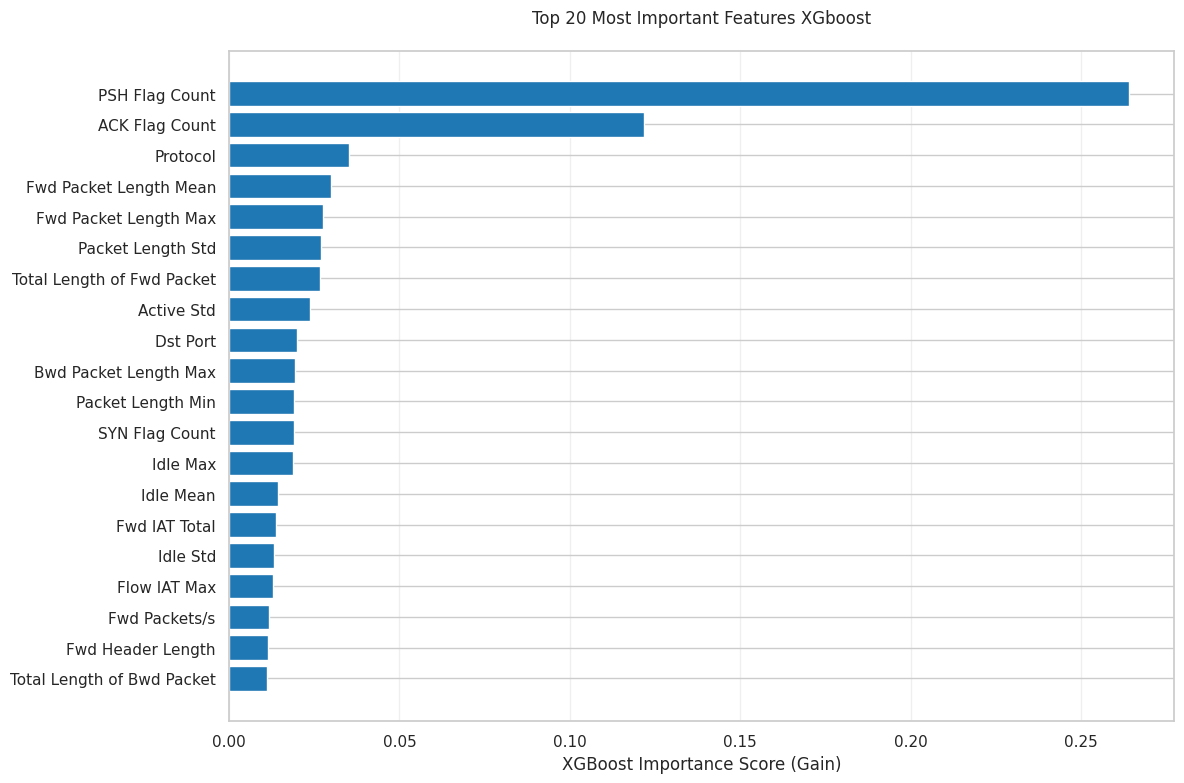

In [ ]:
import matplotlib.pyplot as plt

# Get importance scores
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(12, 8))
plt.barh(importance['Feature'].head(20)[::-1],  # Reverse for best on top
        importance['Importance'].head(20)[::-1],
        color='#1f77b4')
plt.xlabel('XGBoost Importance Score (Gain)')
plt.title('Top 20 Most Important Features XGboost', pad=20)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('xgboost_feature_importance.png', dpi=300)
plt.show()

In [ ]:
import pandas as pd

# 1. Get top important features from XGBoost (assuming you've already run the model)
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

top_features = importance.head(20)['Feature'].tolist()  # Adjust number as needed

# 2. Create reduced DataFrame
df_reduced = df[top_features].copy()

# 3. Add back essential non-feature columns (if needed)
metadata_cols = ['attack_type_encoded', 'malicious']  # Columns to preserve
for col in metadata_cols:
    if col in df.columns:
        df_reduced[col] = df[col]

# 4. Verify
print(f"Reduced dataset shape: {df_reduced.shape}")
print("Columns in df_reduced:")
print(df_reduced.columns.tolist())

# 5. Save to CSV (optional)
df_reduced.to_csv('reduced_dataset.csv', index=False)

Reduced dataset shape: (100000, 22)
Columns in df_reduced:
['PSH Flag Count', 'ACK Flag Count', 'Protocol', 'Fwd Packet Length Mean', 'Fwd Packet Length Max', 'Packet Length Std', 'Total Length of Fwd Packet', 'Active Std', 'Dst Port', 'Bwd Packet Length Max', 'Packet Length Min', 'SYN Flag Count', 'Idle Max', 'Idle Mean', 'Fwd IAT Total', 'Idle Std', 'Flow IAT Max', 'Fwd Packets/s', 'Fwd Header Length', 'Total Length of Bwd Packet', 'attack_type_encoded', 'malicious']


### LOgistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

lr = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

lr.fit(X_train, y_train)

print(f"Best parameters: {lr.best_params_}")

Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix,
                            ConfusionMatrixDisplay, RocCurveDisplay)

# Predictions
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:, 1]

# Calculate metrics
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred),
    'ROC AUC': roc_auc_score(y_test, y_proba)
}

print("\nPerformance Metrics:")
pd.DataFrame(metrics, index=[0]).style.background_gradient(cmap='Blues')


Performance Metrics:


,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,0.863433,0.879869,0.689451,0.773107,0.899146


<Figure size 800x600 with 0 Axes>

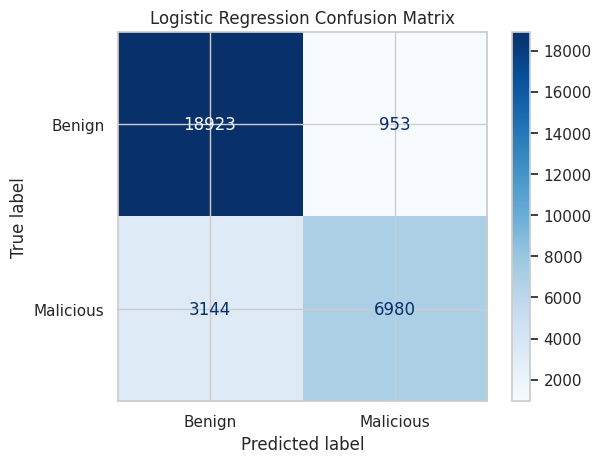

In [ ]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malicious'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Logistic Regression Confusion Matrix')
plt.savefig('logreg_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

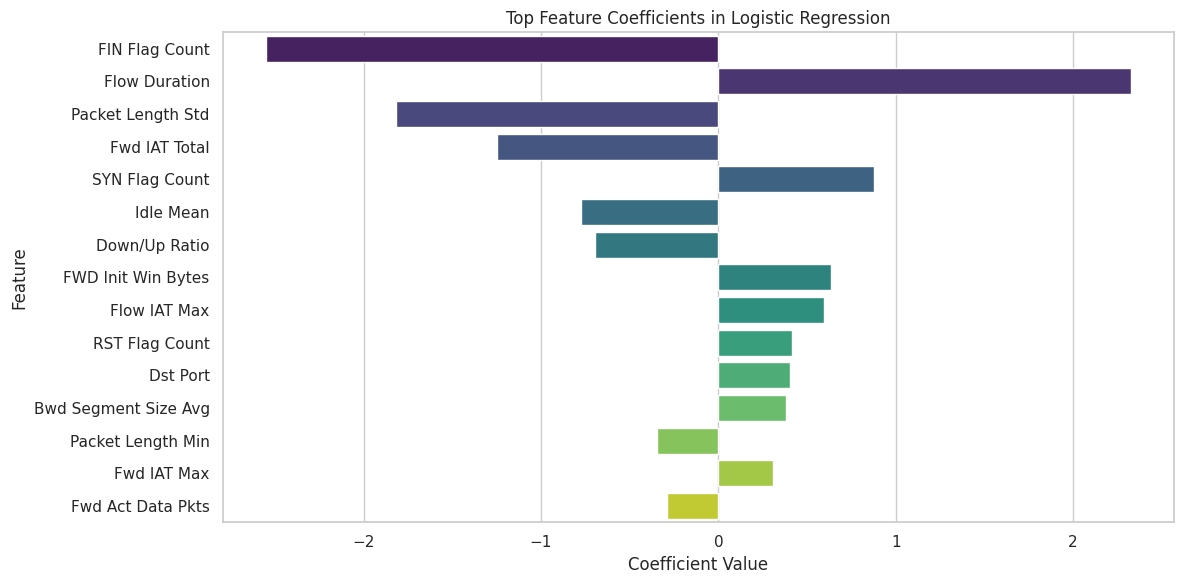

In [ ]:
# Get coefficients
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr.best_estimator_.coef_[0],
    'Absolute_Impact': np.abs(lr.best_estimator_.coef_[0])
}).sort_values('Absolute_Impact', ascending=False)

# Plot top influential features
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=importance.head(15), palette='viridis')
plt.title('Top Feature Coefficients in Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()

plt.show()

##Logistic Regression on Reduced Feature Set

In [ ]:
df_reduced=pd.read_csv('/content/reduced_dataset.csv')

In [ ]:
df_reduced.head()

,PSH Flag Count,ACK Flag Count,Protocol,Fwd Packet Length Mean,Fwd Packet Length Max,Packet Length Std,Total Length of Fwd Packet,Active Std,Dst Port,Bwd Packet Length Max,...,Idle Max,Idle Mean,Fwd IAT Total,Idle Std,Flow IAT Max,Fwd Packets/s,Fwd Header Length,Total Length of Bwd Packet,attack_type_encoded,malicious
0,1.0000,0.8750,0.0000,0.0000,0.7560,1.2225,0.0000,0.0000,-0.0412,2.2781,...,0.0000,0.0000,-0.0000,0.0000,-0.0004,0.6013,0.3333,1.3187,0,0
1,1.0000,0.8750,0.0000,0.2910,1.0833,0.6561,0.2466,0.0000,0.0000,-0.1589,...,0.0000,0.0000,-0.0000,0.0000,-0.0005,0.6037,0.3333,-0.1474,0,0
2,1.0000,0.8750,0.0000,0.0000,0.7560,1.2225,0.0000,0.0000,-0.0412,2.2781,...,0.0000,0.0000,-0.0000,0.0000,-0.0004,0.5983,0.3333,1.3187,0,0
3,1.0000,0.8750,0.0000,0.2910,1.0833,0.6561,0.2466,0.0000,0.0000,-0.1589,...,0.0000,0.0000,-0.0000,0.0000,-0.0004,0.5996,0.3333,-0.1474,0,0
4,1.0000,0.8750,0.0000,0.0000,0.7560,1.2225,0.0000,0.0000,-0.0412,2.2781,...,0.0000,0.0000,-0.0000,0.0000,-0.0004,0.5964,0.3333,1.3187,0,0


In [ ]:
# Separate features and target
X_reduced = df_reduced.drop(['malicious','attack_type_encoded'], axis=1, errors='ignore')
y_reduced = df_reduced['malicious']

# Split data (80% train, 20% test)
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42, stratify=y)



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

lr = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

lr.fit(X_train_reduced, y_train_reduced)

print(f"Best parameters: {lr.best_params_}")

Best parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix,
                            ConfusionMatrixDisplay, RocCurveDisplay)

# Predictions
y_pred = lr.predict(X_test_reduced)
y_proba = lr.predict_proba(X_test_reduced)[:, 1]

# Calculate metrics
metrics = {
    'Accuracy': accuracy_score(y_test_reduced, y_pred),
    'Precision': precision_score(y_test_reduced, y_pred),
    'Recall': recall_score(y_test_reduced, y_pred),
    'F1-Score': f1_score(y_test_reduced, y_pred),
    'ROC AUC': roc_auc_score(y_test_reduced, y_proba)
}

print("\nPerformance Metrics:")
pd.DataFrame(metrics, index=[0]).style.background_gradient(cmap='Blues')


Performance Metrics:


,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,0.752300,0.703351,0.460148,0.556332,0.808412


<Figure size 800x600 with 0 Axes>

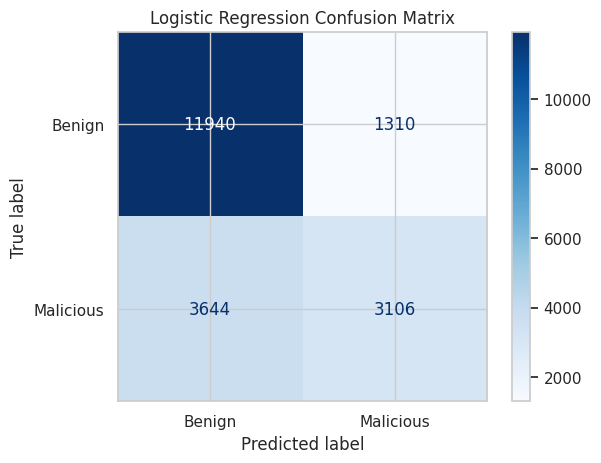

In [ ]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_reduced, y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malicious'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Logistic Regression Confusion Matrix')
plt.savefig('logreg_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

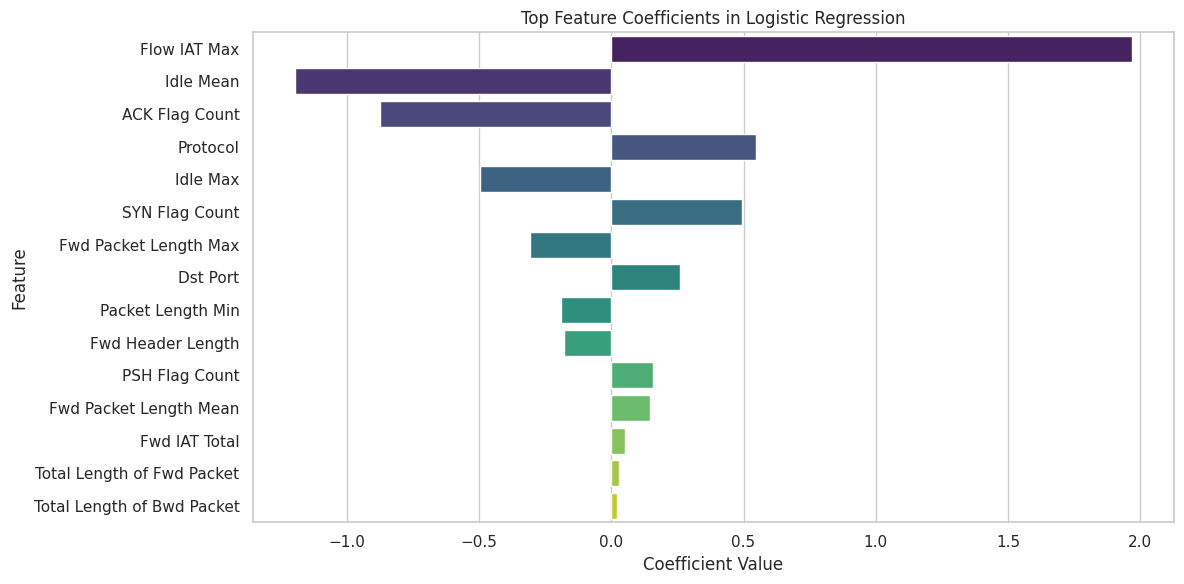

In [ ]:
# Get coefficients
importance = pd.DataFrame({
    'Feature': X_reduced.columns,
    'Coefficient': lr.best_estimator_.coef_[0],
    'Absolute_Impact': np.abs(lr.best_estimator_.coef_[0])
}).sort_values('Absolute_Impact', ascending=False)

# Plot top influential features
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=importance.head(15), palette='viridis')
plt.title('Top Feature Coefficients in Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()

plt.show()

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Optimized parameter grid
param_grid = {
    'n_estimators': [100, 200],       # Number of trees
    'max_depth': [10, 20, None],      # Tree depth
    'min_samples_split': [2, 5],      # Controls tree growth
    'max_features': ['sqrt', 0.5],    # Features per split
    'class_weight': ['balanced']      # Handle imbalanced data
}

rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2  # Shows progress
)

rf.fit(X_train, y_train)

print(f"Best parameters: {rf.best_params_}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [ ]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix,
                            ConfusionMatrixDisplay, RocCurveDisplay)

# Predictions
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

# Metrics
metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred),
    'ROC AUC': roc_auc_score(y_test, y_proba)
}

print("\nRandom Forest Performance Metrics:")
pd.DataFrame(metrics, index=[0]).style.background_gradient(cmap='Purples')


Random Forest Performance Metrics:


,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,0.962833,0.964174,0.980328,0.972184,0.990613


<Figure size 800x600 with 0 Axes>

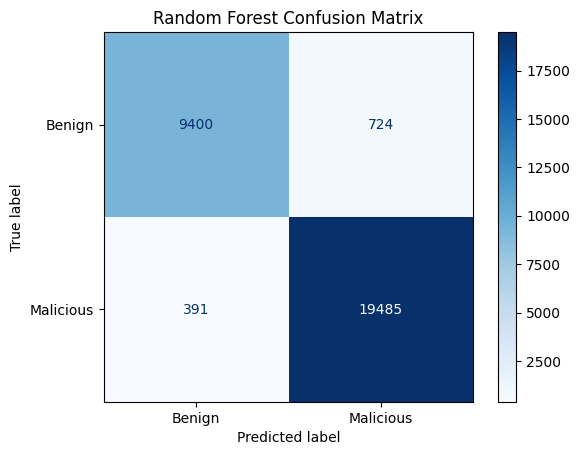

In [ ]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malicious'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Random Forest Confusion Matrix')
plt.savefig('rf_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\rouab\AppData\Local\Temp\ipykernel_206484\1686575742.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')


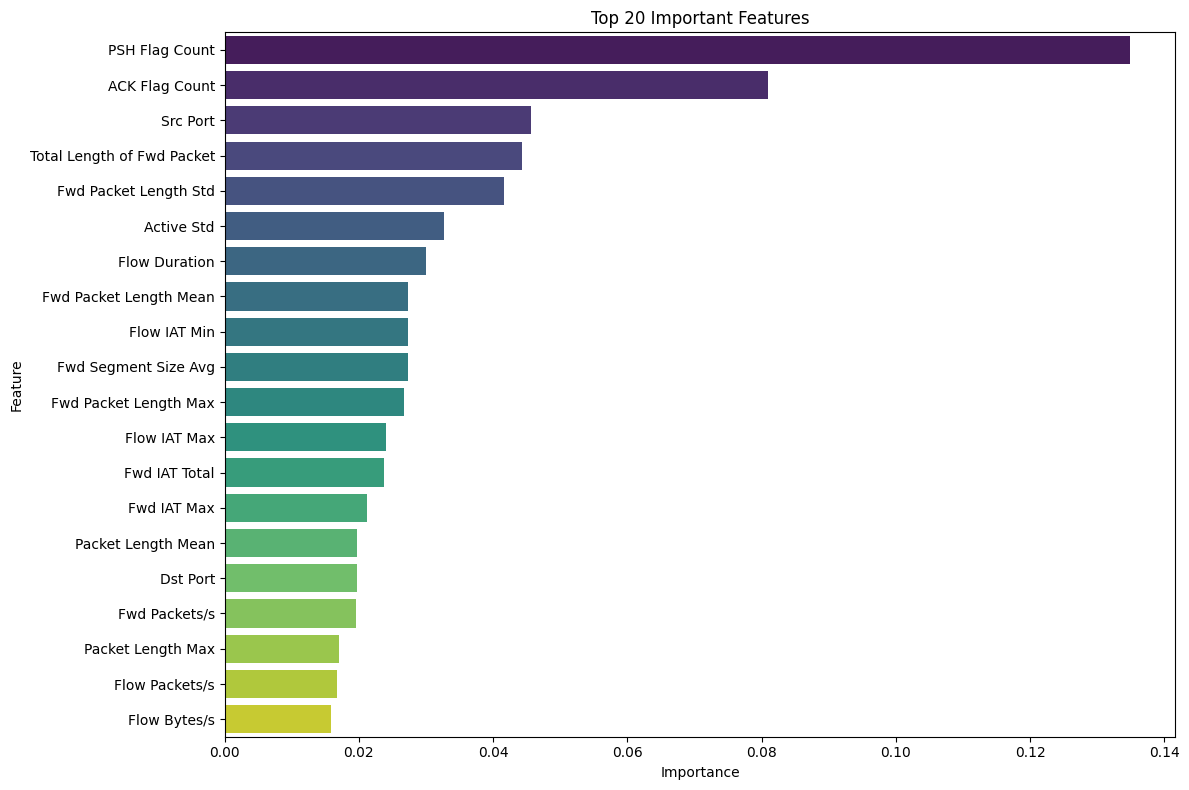

In [ ]:
# Get top 20 important features
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.best_estimator_.feature_importances_
}).sort_values('Importance', ascending=False).head(20)

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')
plt.title('Top 20 Important Features')
plt.tight_layout()
plt.savefig('rf_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

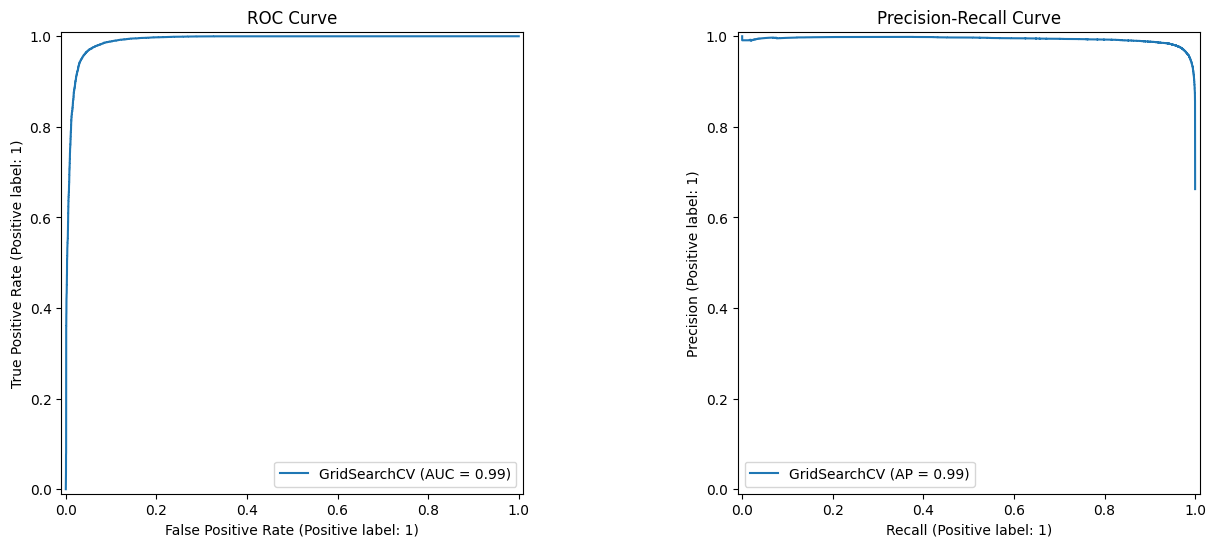

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# ROC Curve
RocCurveDisplay.from_estimator(rf, X_test, y_test, ax=ax1)
ax1.set_title('ROC Curve')

# Precision-Recall Curve
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(rf, X_test, y_test, ax=ax2)
ax2.set_title('Precision-Recall Curve')

plt.savefig('rf_curves.png', dpi=300, bbox_inches='tight')
plt.show()

## Random Forest on Reduced Feature Set

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Optimized parameter grid
param_grid = {
    'n_estimators': [100, 200],       # Number of trees
    'max_depth': [10, 20, None],      # Tree depth
    'min_samples_split': [2, 5],      # Controls tree growth
    'max_features': ['sqrt', 0.5],    # Features per split
    'class_weight': ['balanced']      # Handle imbalanced data
}

rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2  # Shows progress
)

rf.fit(X_train_reduced, y_train_reduced)

print(f"Best parameters: {rf.best_params_}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [ ]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix,
                            ConfusionMatrixDisplay, RocCurveDisplay)

# Predictions
y_pred = rf.predict(X_test_reduced)
y_proba = rf.predict_proba(X_test_reduced)[:, 1]

# Metrics
metrics = {
    'Accuracy': accuracy_score(y_test_reduced, y_pred),
    'Precision': precision_score(y_test_reduced, y_pred),
    'Recall': recall_score(y_test_reduced, y_pred),
    'F1-Score': f1_score(y_test_reduced, y_pred),
    'ROC AUC': roc_auc_score(y_test_reduced, y_proba)
}

print("\nRandom Forest Performance Metrics:")
pd.DataFrame(metrics, index=[0]).style.background_gradient(cmap='Purples')


Random Forest Performance Metrics:


,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,0.941250,0.944424,0.968302,0.956214,0.967295


<Figure size 800x600 with 0 Axes>

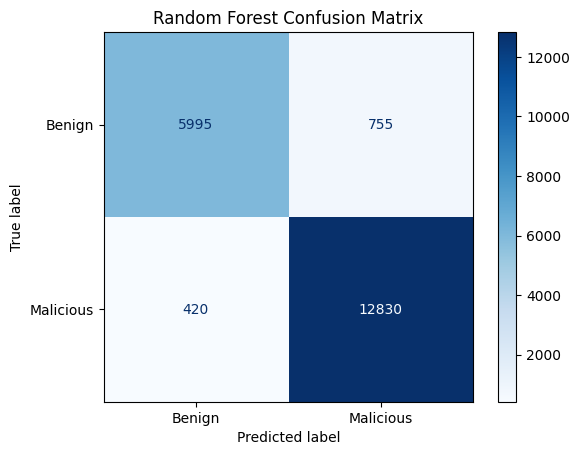

In [ ]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_reduced, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malicious'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Random Forest Confusion Matrix')
plt.savefig('rf_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

## Isolation forest


In [ ]:
from sklearn.ensemble import IsolationForest

# Optimized parameters for network security data
iso = IsolationForest(
    n_estimators=200,       # Number of trees (more=better but slower)
    max_samples=1024,     # Default (256 samples per tree)
    contamination=0.5, # Cap at 0.5 ,     # Expected anomaly proportion (adjust based on your data)
    max_features=0.8,       #Features per tree (reduces overfitting)
    random_state=42,
    n_jobs=-1               # Use all CPU cores
)

# Train on normal data only (better for pure anomaly detection)
# Or use y_train to exclude known attacks if available
X_train_benign = X_train[y_train == 0]  # Assume y_train=0 for benign
iso.fit(X_train_benign)

IsolationForest(contamination=0.5, max_features=0.8, max_samples=1024,
                n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
from sklearn.metrics import classification_report
y_pred = iso.predict(X_test)  # Returns -1 (anomaly) or 1 (normal)
y_pred = np.where(y_pred == -1, 1, 0)  # Convert to 0/1 (attack/benign)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.50      0.64     19876
           1       0.47      0.88      0.62     10124

    accuracy                           0.63     30000
   macro avg       0.68      0.69      0.63     30000
weighted avg       0.75      0.63      0.63     30000



In [ ]:
scores = iso.decision_function(X_test)  # Lower = more anomalous
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, -scores)

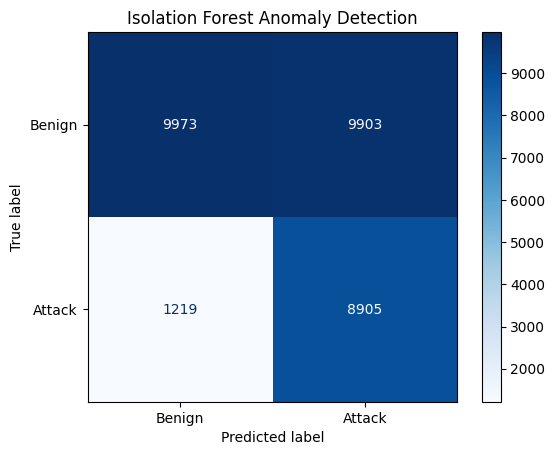

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Get predictions (Isolation Forest returns -1 for anomalies, 1 for normal)
y_pred = iso.predict(X_test)

# 2. Convert to binary labels (0=normal, 1=attack)
y_pred_binary = np.where(y_pred == -1, 1, 0)  # -1 → 1 (attack), 1 → 0 (normal)
y_test_binary = y_test  # Assuming y_test is already 0 (normal) or 1 (attack)

# 3. Generate confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

# 4. Plot with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['Benign', 'Attack'])
disp.plot(cmap='Blues', values_format='d')  # 'd' = integer formatting
plt.title('Isolation Forest Anomaly Detection')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test_binary, y_pred_binary)
recall = recall_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print(f"Precision: {precision:.2f} (Low FP)")
print(f"Recall: {recall:.2f} (Low FN)")
print(f"F1-Score: {f1:.2f}")

Precision: 0.47 (Low FP)
Recall: 0.88 (Low FN)
F1-Score: 0.62


## One class SVM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
                            classification_report, precision_recall_curve)

# 1. Train One-Class SVM
ocsvm = OneClassSVM(kernel='rbf', nu=0.66, gamma='scale')
ocsvm.fit(X_train_benign)  # X_train_benign = X_train[y_train == 0]

# 2. Predict and convert to binary labels (0=normal, 1=attack)
y_pred = ocsvm.predict(X_test)
y_pred_binary = np.where(y_pred == -1, 1, 0)  # -1→attack, 1→normal

# 3. Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred_binary,
                           target_names=['Normal', 'Attack']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['Normal', 'Attack'])
disp.plot(cmap='Blues')
plt.title('One-Class SVM: Confusion Matrix')
plt.show()

# Precision-Recall Curve
y_scores = ocsvm.decision_function(X_test)  # Lower = more anomalous
precision, recall, _ = precision_recall_curve(y_test, -y_scores)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

## XGBoost

Standard Threshold (0.5) Results:
              precision    recall  f1-score   support

      Normal       0.98      0.95      0.97     19876
      Attack       0.91      0.96      0.93     10124

    accuracy                           0.95     30000
   macro avg       0.94      0.96      0.95     30000
weighted avg       0.96      0.95      0.95     30000


Tuned Threshold (0.2) Results:
              precision    recall  f1-score   support

      Normal       0.99      0.87      0.93     19876
      Attack       0.80      0.98      0.88     10124

    accuracy                           0.91     30000
   macro avg       0.89      0.93      0.91     30000
weighted avg       0.93      0.91      0.91     30000


[Security Alert] 165 attacks were missed after tuning:


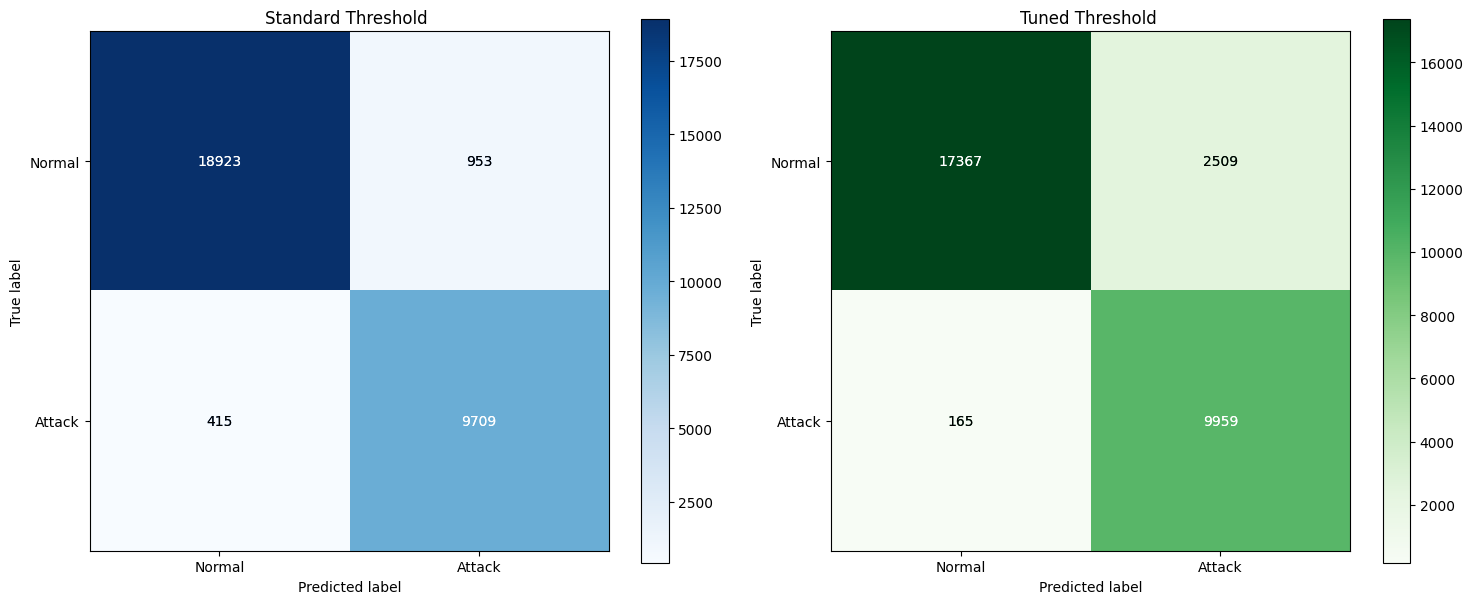

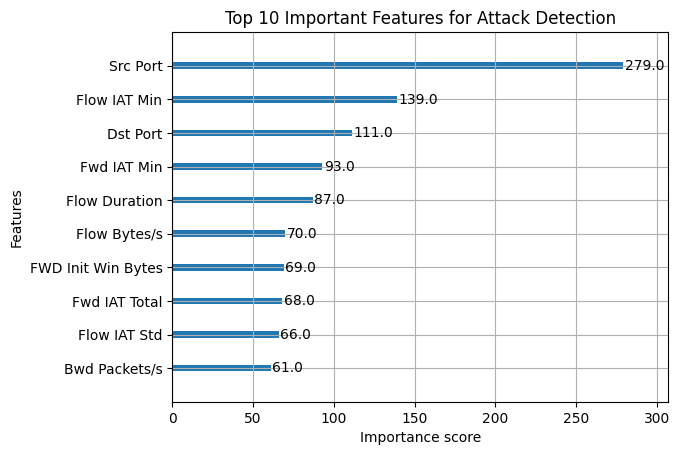

In [9]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Initialize and train model
model = XGBClassifier(
    scale_pos_weight=3,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)
model.fit(X_train, y_train)

# --- Standard Prediction ---
y_pred = model.predict(X_test)
print("Standard Threshold (0.5) Results:")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Attack']))

# --- Threshold Tuning ---
y_proba = model.predict_proba(X_test)[:, 1]
y_pred_tuned = (y_proba > 0.2).astype(int)
print("\nTuned Threshold (0.2) Results:")
print(classification_report(y_test, y_pred_tuned, target_names=['Normal', 'Attack']))

# --- False Negative Analysis ---
fn_mask = (y_test == 1) & (y_pred_tuned == 0)
fn_samples = X_test[fn_mask]
print(f"\n[Security Alert] {len(fn_samples)} attacks were missed after tuning:")

# --- Visual Confusion Matrices ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Standard threshold matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=['Normal', 'Attack'],
    cmap='Blues',
    ax=ax1,
    values_format='d'
)
ax1.set_title('Standard Threshold ')

# Tuned threshold matrix
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_tuned,
    display_labels=['Normal', 'Attack'],
    cmap='Greens',
    ax=ax2,
    values_format='d'
)
ax2.set_title('Tuned Threshold ')

# Highlight differences
for i in range(2):
    for j in range(2):
        ax1.text(j, i, f"{confusion_matrix(y_test, y_pred)[i, j]}",
                ha='center', va='center',
                color='white' if confusion_matrix(y_test, y_pred)[i, j] > confusion_matrix(y_test, y_pred).max()/2 else 'black')
        ax2.text(j, i, f"{confusion_matrix(y_test, y_pred_tuned)[i, j]}",
                ha='center', va='center',
                color='white' if confusion_matrix(y_test, y_pred_tuned)[i, j] > confusion_matrix(y_test, y_pred_tuned).max()/2 else 'black')

plt.tight_layout()
plt.show()

# --- Feature Importance ---
from xgboost import plot_importance
plot_importance(model, max_num_features=10)
plt.title('Top 10 Important Features for Attack Detection')
plt.show()

now we pick this algorithm to be saved ( to create this pickle file containing the pre trained model...we loaded the dataset again, applied some processing and then the scaling was integrated into the pipeline so it can be saved in the model ...its not here in the notebook to avoid repeating the same steps)





/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:03:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Binary Classification Report (Malicious vs Benign):
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     13250
           1       0.95      0.95      0.95      6750

    accuracy                           0.97     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.97      0.97      0.97     20000



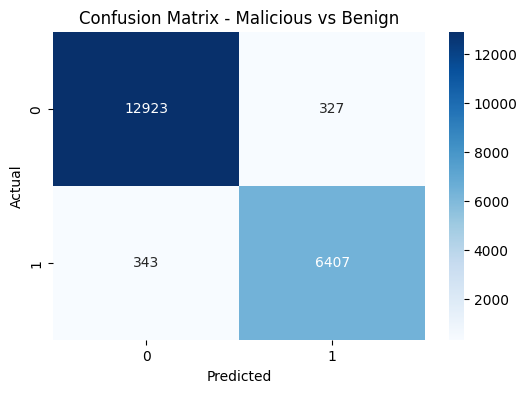


Attack Type Classification Report:
                         precision    recall  f1-score   support

                 benign       0.95      0.99      0.97     13250
 ddos_ack_fragmentation       1.00      0.99      1.00       150
        ddos_icmp_flood       0.72      0.58      0.64       589
ddos_icmp_fragmentation       0.69      0.46      0.55       247
         ddos_udp_flood       1.00      0.99      0.99      1590
  dictionary_bruteforce       0.59      0.84      0.70       632
           dns_spoofing       0.63      0.37      0.47       151
         dos_http_flood       0.98      0.98      0.98       624
          dos_syn_flood       1.00      0.99      0.99       834
      mirai_greip_flood       0.73      0.64      0.68       376
       mitm_arpspoofing       0.61      0.33      0.42       156
          sql_injection       0.80      0.71      0.75       500
       uploading_attack       0.64      0.43      0.51       251
     vulnerability_scan       0.78      0.45      0.5

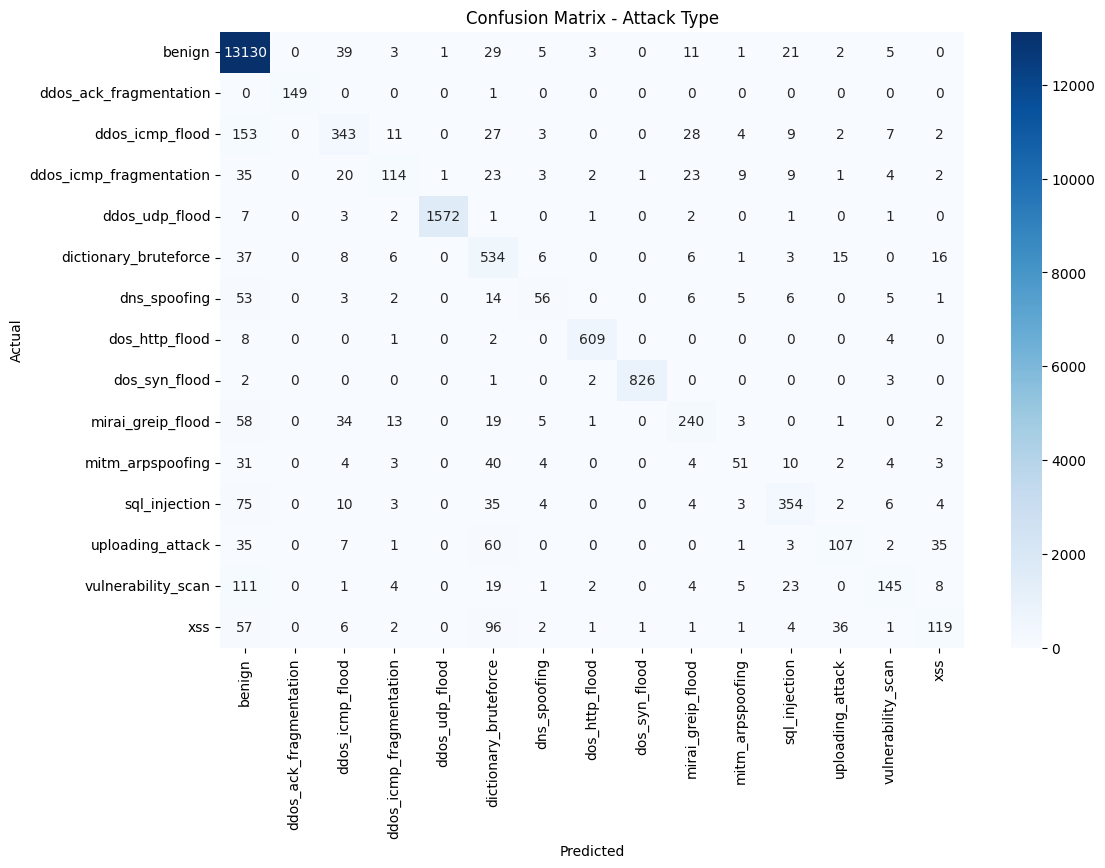

✅ Models saved as iot_anomaly_pipeline.pkl


In [ ]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
import xgboost as xgb



# Features and labels
X = df_clean.drop(columns=["malicious", "attack_type_encoded"])
y_binary = df_clean["malicious"]
y_attack = df_clean["attack_type_encoded"]

# Split into train/test
X_train, X_test, y_binary_train, y_binary_test, y_attack_train, y_attack_test = train_test_split(
    X, y_binary, y_attack, test_size=0.2, random_state=42, stratify=y_binary
)

# ========================================
# Attack type mapping
# ========================================
attack_type_mapping = {
    0: 'benign',
    1: 'ddos_ack_fragmentation',
    2: 'ddos_icmp_flood',
    3: 'ddos_icmp_fragmentation',
    4: 'ddos_udp_flood',
    5: 'dictionary_bruteforce',
    6: 'dns_spoofing',
    7: 'dos_http_flood',
    8: 'dos_syn_flood',
    9: 'mirai_greip_flood',
    10: 'mitm_arpspoofing',
    11: 'sql_injection',
    12: 'uploading_attack',
    13: 'vulnerability_scan',
    14: 'xss'
}

# ========================================
# Handle class imbalance in binary classifier
# ========================================
# Compute scale_pos_weight to handle class imbalance
# Compute scale_pos_weight


scale_pos_weight = len(y_binary_train[y_binary_train==0]) / len(y_binary_train[y_binary_train==1])

binary_clf = Pipeline([
    ("scaler", RobustScaler()),
    ("model", xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=scale_pos_weight
    ))
])

binary_clf.fit(X_train, y_binary_train)
# ========================================
# Evaluate Binary
# ========================================
y_binary_pred = binary_clf.predict(X_test)
print("Binary Classification Report (Malicious vs Benign):")
print(classification_report(y_binary_test, y_binary_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_binary_test, y_binary_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Malicious vs Benign")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ========================================
# Evaluate Multi-class
# ========================================
y_attack_pred = multi_clf.predict(X_test)
print("\nAttack Type Classification Report:")
print(classification_report(
    y_attack_test,
    y_attack_pred,
    target_names=[attack_type_mapping[i] for i in sorted(attack_type_mapping.keys())]
))

plt.figure(figsize=(12, 8))
sns.heatmap(
    confusion_matrix(y_attack_test, y_attack_pred),
    annot=True, fmt='d', cmap='Blues',
    xticklabels=[attack_type_mapping[i] for i in sorted(attack_type_mapping.keys())],
    yticklabels=[attack_type_mapping[i] for i in sorted(attack_type_mapping.keys())]
)
plt.title("Confusion Matrix - Attack Type")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

# ========================================
# Save models + mapping in one pickle
# ========================================
final_model_package = {
    "binary_model": binary_clf,
    "multi_model": multi_clf,
    "attack_type_mapping": attack_type_mapping
}

with open("iot_anomaly_pipeline.pkl", "wb") as f:
    pickle.dump(final_model_package, f)

print("✅ Models saved as iot_anomaly_pipeline.pkl")

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# For binary classification validation:
xgb_binary = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# cross_val_score uses default scoring = accuracy, you can change to 'f1' or others
scores = cross_val_score(xgb_binary, X, y_binary, cv=skf, scoring='f1', n_jobs=-1)

print("Binary Classification - F1 scores for each fold:", scores)
print("Mean F1 score:", np.mean(scores))


Binary Classification - F1 scores for each fold: [0.97445283 0.97471196 0.97377184 0.97340167 0.97309015]
Mean F1 score: 0.9738856881533209


In [ ]:
xgb_attack = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(attack_type_mapping),
    use_label_encoder=False,
    eval_metric='mlogloss'
)

scores = cross_val_score(xgb_attack, X, y_attack, cv=skf, scoring='f1_weighted', n_jobs=-1)

print("Multi-class Classification - Weighted F1 scores for each fold:", scores)
print("Mean Weighted F1 score:", np.mean(scores))


Multi-class Classification - Weighted F1 scores for each fold: [0.9957393  0.99635508 0.99580361 0.99549647 0.9961177 ]
Mean Weighted F1 score: 0.9959024296393535


## Local Outlier Factor (LOF)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


Classification Report:
              precision    recall  f1-score   support

      Normal       0.81      0.58      0.68     19876
      Attack       0.47      0.74      0.58     10124

    accuracy                           0.63     30000
   macro avg       0.64      0.66      0.63     30000
weighted avg       0.70      0.63      0.64     30000



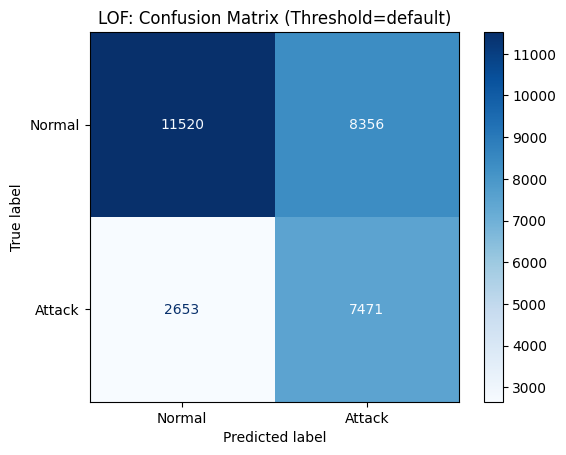

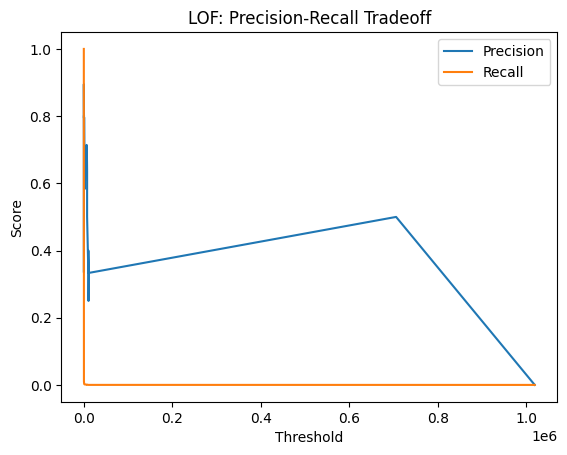


Tuned Classification Report (Recall >= 90%):
              precision    recall  f1-score   support

           0       1.00      0.00      0.00     19876
           1       0.34      1.00      0.50     10124

    accuracy                           0.34     30000
   macro avg       0.67      0.50      0.25     30000
weighted avg       0.78      0.34      0.17     30000



In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import RobustScaler



# 2. Initialize and train LOF
lof = LocalOutlierFactor(
    n_neighbors=20,       # Number of neighbors to compare (adjust based on data density)
    contamination=0.4,    # Approximate attack ratio in your data (40%)
    novelty=True,         # Required for test-time prediction
    metric='euclidean',   # Distance metric (use 'mahalanobis' for correlated features)
    n_jobs=-1            # Use all CPU cores
)
lof.fit(X_train[y_train == 0])  # Train on benign data only

# 3. Predict on test data
y_scores = -lof.decision_function(X_test)  # Higher scores = more anomalous
y_pred = lof.predict(X_test)               # Returns -1 (outlier) or 1 (inlier)
y_pred_binary = np.where(y_pred == -1, 1, 0)      # Convert to 0 (normal), 1 (attack)

# 4. Evaluate
print("Classification Report:")
print(classification_report(y_test, y_pred_binary, target_names=['Normal', 'Attack']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Attack'])
disp.plot(cmap='Blues', values_format='d')
plt.title('LOF: Confusion Matrix (Threshold=default)')
plt.show()

# 5. Tune threshold using precision-recall curve
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('LOF: Precision-Recall Tradeoff')
plt.show()

# 6. Select optimal threshold (e.g., target recall=0.90)
target_recall = 0.90
optimal_idx = np.where(recall >= target_recall)[0][0]
optimal_threshold = thresholds[optimal_idx]
y_pred_tuned = (y_scores > optimal_threshold).astype(int)

print("\nTuned Classification Report (Recall >= 90%):")
print(classification_report(y_test, y_pred_tuned))

## Autoencoders

Epoch 1/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 615579779072.0000 - val_loss: 9642369024.0000 - learning_rate: 0.0010
Epoch 2/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 43513475072.0000 - val_loss: 1732910464.0000 - learning_rate: 0.0010
Epoch 3/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 28561410048.0000 - val_loss: 1701722368.0000 - learning_rate: 0.0010
Epoch 4/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23835092992.0000 - val_loss: 1178439424.0000 - learning_rate: 0.0010
Epoch 5/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 18593941504.0000 - val_loss: 1453941248.0000 - learning_rate: 0.0010
Epoch 6/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 18520166400.0000 - val_loss: 926618432.0000 - learning_rate: 0.0010
Epoch 7/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 18658002944.0000 - val_loss: 1274122624.0000 - learning_rate: 0.0010
Epoch 8/200
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 15964465152.0000 - val_loss:

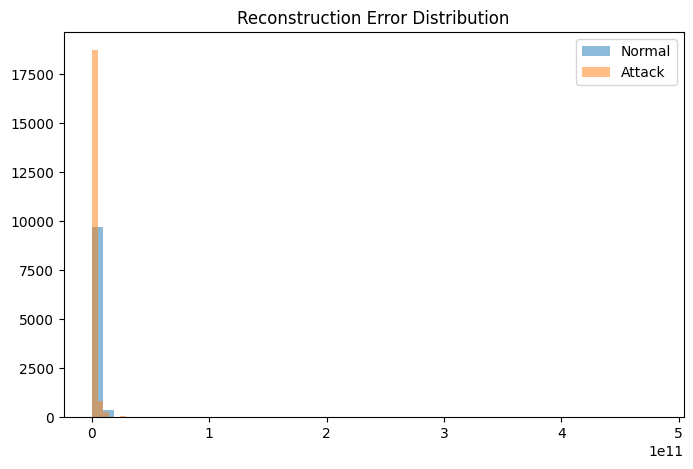


--- PR-curve Threshold = 0.129444 ---
              precision    recall  f1-score   support

      Normal       1.00      0.00      0.00     10124
      Attack       0.66      1.00      0.80     19876

    accuracy                           0.66     30000
   macro avg       0.83      0.50      0.40     30000
weighted avg       0.78      0.66      0.53     30000



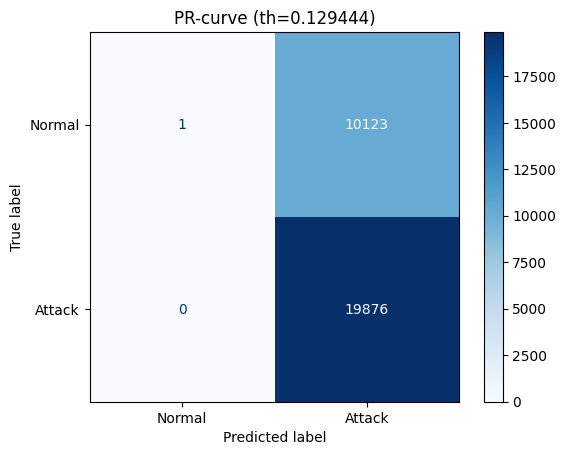


--- P95 Normal Threshold = 5133386475.039997 ---
              precision    recall  f1-score   support

      Normal       0.34      0.95      0.50     10124
      Attack       0.69      0.06      0.11     19876

    accuracy                           0.36     30000
   macro avg       0.52      0.50      0.30     30000
weighted avg       0.57      0.36      0.24     30000



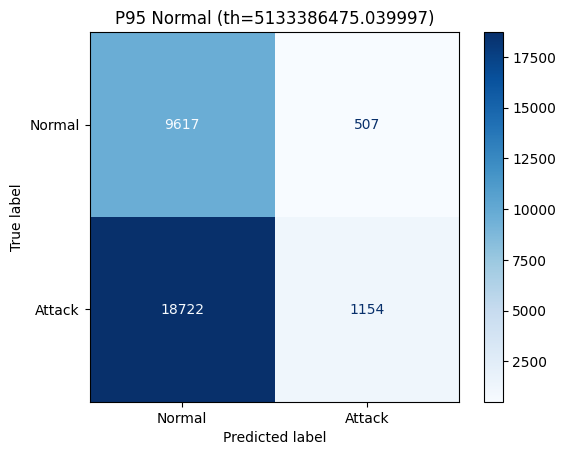


--- P99 Normal Threshold = 13572455093.414818 ---
              precision    recall  f1-score   support

      Normal       0.34      0.99      0.50     10124
      Attack       0.46      0.00      0.01     19876

    accuracy                           0.34     30000
   macro avg       0.40      0.50      0.26     30000
weighted avg       0.42      0.34      0.18     30000



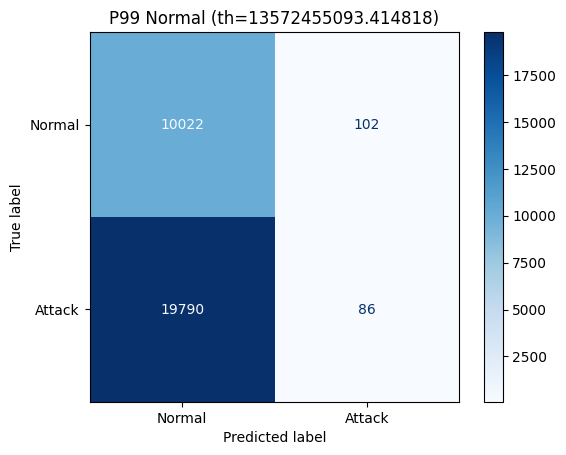

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve
import matplotlib.pyplot as plt

# =============================================
# 1. Data Preparation
# =============================================
X_train_benign = X_train[y_train == 0]  # Only benign samples for training
X_test_scaled = X_test  # Already scaled test data

# =============================================
# 2. Autoencoder Architecture
# =============================================
input_dim = X_train_benign.shape[1]
encoding_dim = int(input_dim * 0.25)

input_layer = layers.Input(shape=(input_dim,))
encoder = layers.Dense(encoding_dim*2, activation='relu')(input_layer)
encoder = layers.Dropout(0.2)(encoder)
encoder = layers.Dense(encoding_dim, activation='relu')(encoder)
decoder = layers.Dense(input_dim, activation='linear')(encoder)

autoencoder = models.Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# =============================================
# 3. Training
# =============================================
history = autoencoder.fit(
    X_train_benign, X_train_benign,
    epochs=200,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        callbacks.ReduceLROnPlateau(factor=0.5, patience=5)
    ],
    verbose=1
)

# =============================================
# 4. Predictions & Error Calculation
# =============================================
test_pred = autoencoder.predict(X_test_scaled)
test_mse = np.mean(np.power(X_test_scaled - test_pred, 2), axis=1)

# --- Debug: Error stats ---
print("\nError statistics:")
print("Normal samples: min={:.6f}, max={:.6f}".format(
    np.min(test_mse[y_test == 0]), np.max(test_mse[y_test == 0])))
print("Attack samples: min={:.6f}, max={:.6f}".format(
    np.min(test_mse[y_test == 1]), np.max(test_mse[y_test == 1])))

# --- Plot distributions ---
plt.figure(figsize=(8, 5))
plt.hist(test_mse[y_test == 0], bins=50, alpha=0.5, label='Normal')
plt.hist(test_mse[y_test == 1], bins=50, alpha=0.5, label='Attack')
plt.legend()
plt.title("Reconstruction Error Distribution")
plt.show()

# =============================================
# 5. Multiple Threshold Tests
# =============================================

thresholds_dict = {}

# Method 1: Precision-Recall curve based
precision, recall, thresholds = precision_recall_curve(y_test, test_mse)
target_recall = 0.9
valid_idxs = np.where(recall >= target_recall)[0]
if len(valid_idxs) > 0:
    thresholds_dict['PR-curve'] = thresholds[valid_idxs[0]]

# Method 2: 95th percentile of normal errors
thresholds_dict['P95 Normal'] = np.percentile(test_mse[y_test == 0], 95)

# Method 3: 99th percentile of normal errors
thresholds_dict['P99 Normal'] = np.percentile(test_mse[y_test == 0], 99)

# =============================================
# 6. Evaluate Each Threshold
# =============================================
for method, th in thresholds_dict.items():
    print(f"\n--- {method} Threshold = {th:.6f} ---")
    y_pred = (test_mse > th).astype(int)
    print(classification_report(y_test, y_pred, target_names=['Normal', 'Attack']))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Attack'])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"{method} (th={th:.6f})")
    plt.show()
